In [90]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import fetch_openml

Q2_1

Implement the k-nearest neighbour classifier on the MNIST dataset with 2×1 vectors for the
same two classes used in the previous exercise. Use euclidean distance as the distance metric. Compute
the kNN solution for each integer k from 1 to 5.

In [91]:
# Load the MNIST dataset, False makes it return the data as a NumPy array 
mnist = fetch_openml('mnist_784', version=1, as_frame=False, parser='liac-arff')

# Flatten the images
X = mnist.data
y = mnist.target
#print(X.shape) #(70000, 784)

# Split the data into a training set and a test set
X_train, y_train = X[:60000], y[:60000]
X_test, y_test = X[60000:], y[60000:]

# Filter the training data for classes 3 and 4
mask_train = np.isin(y_train, ['3', '4'])
X_train, y_train = X_train[mask_train], y_train[mask_train]

# Filter the test data for classes 3 and 4
mask_test = np.isin(y_test, ['3', '4'])
X_test, y_test = X_test[mask_test], y_test[mask_test]

# Convert labels to integers
y_train = y_train.astype(int)
y_test = y_test.astype(int)

In [92]:
# Use PCA to convert the 11973x784 vectors to 11973x2 vectors
pca_train = PCA(n_components=2)
X_pca_train = pca_train.fit_transform(X_train) #print(X_pca.shape) = (11973, 2)
pca_test = PCA(n_components=2)
X_pca_test = pca_test.fit_transform(X_test) #print(X_pca.shape) = (1992, 2)

print(X_pca_train.shape) #(11973, 2)
print(y_train.shape) #(11973,)
print(X_pca_test.shape) #(1992, 2)
print(y_test.shape) #(1992, )

(11973, 2)
(11973,)
(1992, 2)
(1992,)


In [95]:
class KNNeighbor:
    def __init__(self, k):
        self.k = k
        self.eps = 1e-8

    def train(self, X, y):
        self.X_train = X
        self.y_train = y

    def pred(self, X_test):
        distances = self.Euclidean_distance(X_test)

        return self.pred_labels(distances)

    def Euclidean_distance(self, X_test):
        test_samples = X_test.shape[0]
        train_samples = self.X_train.shape[0]
        distances = np.zeros((test_samples, train_samples))

        for i in range(test_samples):
            distances[i, :] = np.sqrt(
                self.eps + np.sum((self.X_train - X_test[i, :]) ** 2, axis=1)
            )

        return distances

    def pred_labels(self, distances):
        test_samples = distances.shape[0]
        y_pred = np.zeros(test_samples)

        for i in range(test_samples):
            y_indices = np.argsort(distances[i, :])
            k_closest_classes = self.y_train[y_indices[: self.k]].astype(int)
            y_pred[i] = np.argmax(np.bincount(k_closest_classes))

        return y_pred


if __name__ == "__main__":
    X = np.array(X_pca_train)
    y = np.array(y_train)

    for k in range(1,6):
        KNN = KNNeighbor(k)
        KNN.train(X, y)
        y_pred = KNN.pred(X)
        print(f"Accuracy: {sum(y_pred == y) / len(y)}")

Accuracy: 1.0
Accuracy: 0.9835463125365406
Accuracy: 0.9836298337927002
Accuracy: 0.9793702497285559
Accuracy: 0.9800384197778335


In [65]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# For each integer k from 1 to 5
for k in range(1, 6):
    # Create a kNN classifier
    knn = KNeighborsClassifier(n_neighbors=k)
    
    # Fit the classifier to the data
    knn.fit(X_pca_train, y_train)
    
    # Predict the labels for the data
    y_pred_knn = knn.predict(X_pca_train)
    
    # Compute the accuracy of the classifier
    accuracy = accuracy_score(y_train, y_pred_knn)

    print(y_pred_knn)
    print(f"Accuracy of kNN with k={k}: {accuracy}")

[4 3 4 ... 3 3 3]
Accuracy of kNN with k=1: 1.0
[4 3 4 ... 3 3 3]
Accuracy of kNN with k=2: 0.9835463125365406
[4 3 4 ... 3 3 3]
Accuracy of kNN with k=3: 0.9836298337927002
[4 3 4 ... 3 3 3]
Accuracy of kNN with k=4: 0.9793702497285559
[4 3 4 ... 3 3 3]
Accuracy of kNN with k=5: 0.9801219410339932


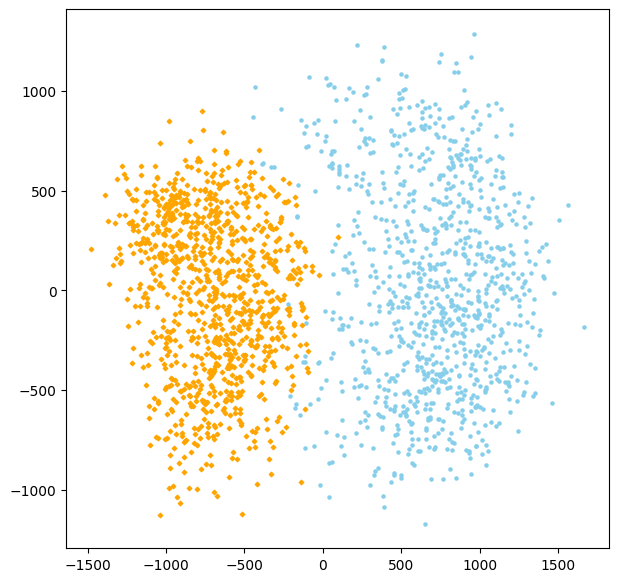

In [60]:
pca_train = PCA(n_components=2)
X_pca_test = pca_train.fit_transform(X_test)

knn = KNeighborsClassifier(n_neighbors=3) #ED
knn.fit(X_pca_train, y_train)
y_pred_knn = knn.predict(X_pca_test)

# Assuming y_pred_knn is your predicted target and it has two classes 3 and 4
plt.figure(figsize=(7, 7))
c1, c2 = "#87CEEB", "#FFA500"  # Colors for the two classes
plt.scatter(*X_pca_test[y_pred_knn==3].T, c=c1, s=5)
plt.scatter(*X_pca_test[y_pred_knn==4].T, c=c2, marker="D", s=5)
plt.show()


Q2_2

Use the test set of the two classes and find the classification accuracy for all kNN classifiers. Plot
the accuracy for each value of k.

In [100]:
# Initialize an empty list to store the accuracies
accuracies_test = []
accuracies_train = []

if __name__ == "__main__":
    X_pca_train = np.array(X_pca_train)
    y_train = np.array(y_train)
    X_pca_test = np.array(X_pca_test)
    y_test = np.array(y_test)

    for k in range(1,6):
        KNN = KNNeighbor(k)
        KNN.train(X_pca_train, y_train)
        y_pred_train = KNN.pred(X_pca_train)
        accuracy_train = sum(y_pred_train == y_train) / y_train.shape[0]
        accuracies_train.append(accuracy_train)

        y_pred_test = KNN.pred(X_pca_test)
        accuracy_test = sum(y_pred_test == y_test) / y_test.shape[0]
        accuracies_test.append(accuracy_test)

[0.9693775100401606, 0.964859437751004, 0.9769076305220884, 0.9738955823293173, 0.9769076305220884]


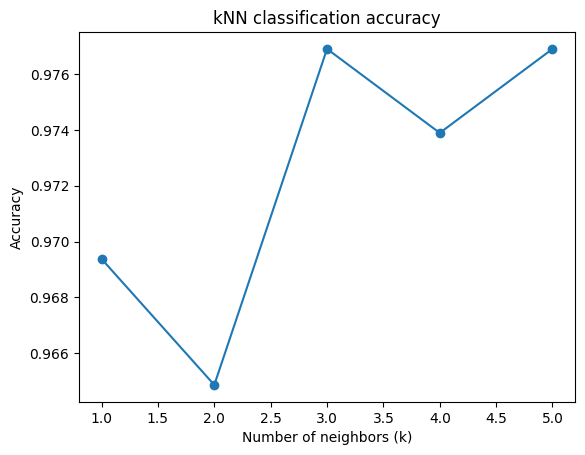

In [101]:
print(accuracies_test)
# Plot the accuracies
plt.plot(range(1, 6), accuracies_test, marker='o')
plt.title('kNN classification accuracy')
plt.xlabel('Number of neighbors (k)')
plt.ylabel('Accuracy')
plt.show()

Q2_3

Which k value seems to be producing the best results? Why?

When k equals 3 or 5, the results are optimal in the result. However, when k is smaller, it becomes sensitive to noise in the data. Additionally, odd values of k generally perform better than even values. This is because even values may lead to tie situations, which can sometimes make the decision-making process ambiguous, especially in binary classification.

Q2_4

How does the kNN classifier compare against the MED and MMD classifiers in the previous
exercise?

The kNN classifier is more flexible than both the MED and MMD classifiers, particularly when dealing with complex decision boundaries. However, the kNN classifier can be computationally expensive when handling large datasets and is more susceptible to noise.



Q2-5

Now let’s do kNN regression, which is similar to classification, but instead of aggregating labels
by taking the majority, we average the y values of the k nearest neighbours. For this, use the training
set of the d = 20 mystery dataset F available on the course website, and compute the kNN regression
solution with each integer k from 1 to 3. Report the mean squared error using the test set of the mystery
dataset F for the three kNN classifiers. Which k value seems to be giving you the best result? Explain.

In [1]:
import csv
import numpy as np
import matplotlib.pyplot as plt

# Specify the path to your CSV file
csv_Y_train_file_path = '/home/thuang/SYDE_675/Assignment1/Y_train_F.csv'
csv_X_train_file_path = '/home/thuang/SYDE_675/Assignment1/X_train_F.csv'
csv_Y_test_file_path = '/home/thuang/SYDE_675/Assignment1/Y_test_F.csv'
csv_X_test_file_path = '/home/thuang/SYDE_675/Assignment1/X_test_F.csv'

# Function to load and convert CSV to NumPy
def load_and_convert(file_path):
    data = []
    with open(file_path,'r') as file:
        csv_reader = csv.reader(file)
        header = next(csv_reader, None)
        for row in csv_reader:
            data.append([float(value) for value in row])
    return  np.array(data)

# Load and convert each dataset
Y_train_F = load_and_convert(csv_Y_train_file_path)
X_train_F = load_and_convert(csv_X_train_file_path)
Y_test_F = load_and_convert(csv_Y_test_file_path)
X_test_F = load_and_convert(csv_X_test_file_path)

# Print the shapes of the NumPy arrays
print("Shape of Y_train_F:", Y_train_F.shape) #(99, 1)
print("Shape of X_train_F:", X_train_F.shape) #(99, 20)
print("Shape of Y_test_F:", Y_test_F.shape) #(99, 1)
print("Shape of X_test_F:", X_test_F.shape) #(99, 20)

Shape of Y_train_F: (99, 1)
Shape of X_train_F: (99, 20)
Shape of Y_test_F: (99, 1)
Shape of X_test_F: (99, 20)


In [6]:
def Euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2)**2, axis=1))

def KNN_Regression(X_train, Y_train, X_test, k):
    Y_pred = np.zeros(X_test.shape[0])
    for i in range(X_test.shape[0]):
        distances = Euclidean_distance(X_train, X_test[i, :])
        idx = np.argsort(distances)
        knn = Y_train[idx[:k]]
        Y_pred[i] = np.mean(knn)
    return Y_pred

def mean_squared_error(y_true, y_pred):
    return np.mean((y_true - y_pred)**2)

# flat array
Y_train_F = Y_train_F.flatten()

for k in range(1, 4):
    Y_pred = KNN_Regression(X_train_F, Y_train_F, X_test_F, k)
    mse = mean_squared_error(Y_test_F.flatten(), Y_pred)
    print(f"Mean Squared Error for k={k}: {mse}")



Mean Squared Error for k=1: 5.345166127093706
Mean Squared Error for k=2: 4.390415367943646
Mean Squared Error for k=3: 3.8738548973640072


k=3 yields the lowest MSE of 3.8738548973640072, so it is the best for this dataset. The reason k=3 performs better might be due to it considering more neighboring points, which can lead to a more robust estimation of the target variable.